In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
path = '/home/jlanecki/AGH/TW/lab2/logs/threads_fair.csv'
cols = [
    'bufsize',
    'prod_cons',
    'size',
    'pk_config',
    'is_fair',
    'rand',
    'time'
]
data = pd.read_csv(path, names=cols)

In [4]:
data.shape

(16795347, 7)

In [5]:
data.head()

,bufsize,prod_cons,size,pk_config,is_fair,rand,time
0,10000,PROD,362,100+100,True,UNIFORM,9325
1,10000,PROD,1642,100+100,True,UNIFORM,5247244
2,10000,PROD,126,100+100,True,UNIFORM,13995
3,10000,PROD,3409,100+100,True,UNIFORM,10758
4,10000,PROD,74,100+100,True,UNIFORM,8416


In [6]:
gr_cols = [c for c in cols if c not in ['size', 'time']]
groups = data.groupby(gr_cols)

(10000, 'CONS', '100+100', True, 'GEOMETRIC')


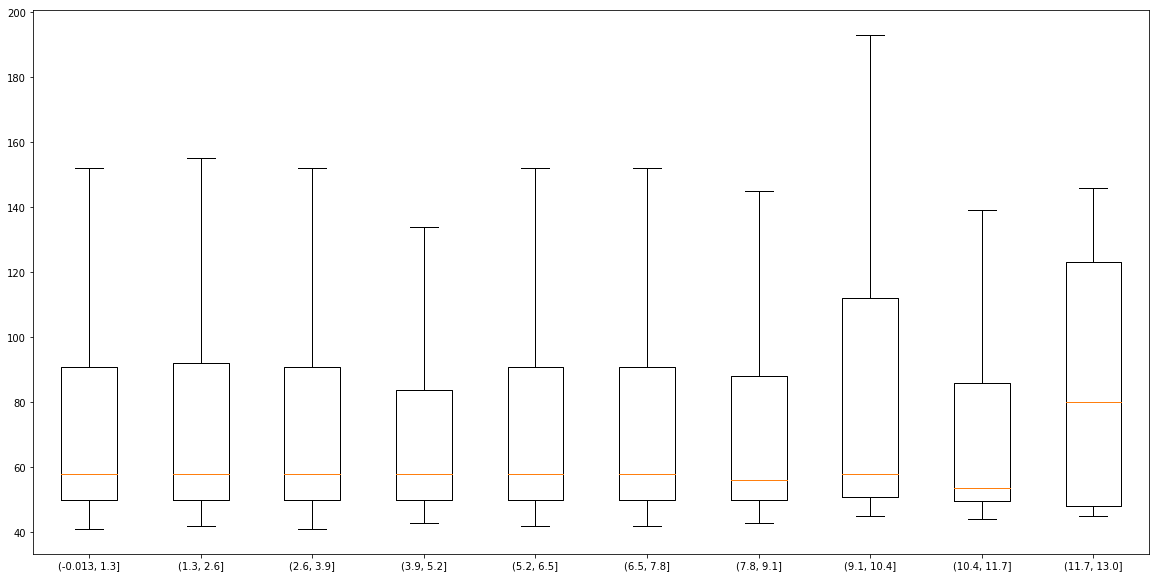

(10000, 'CONS', '100+100', True, 'UNIFORM')


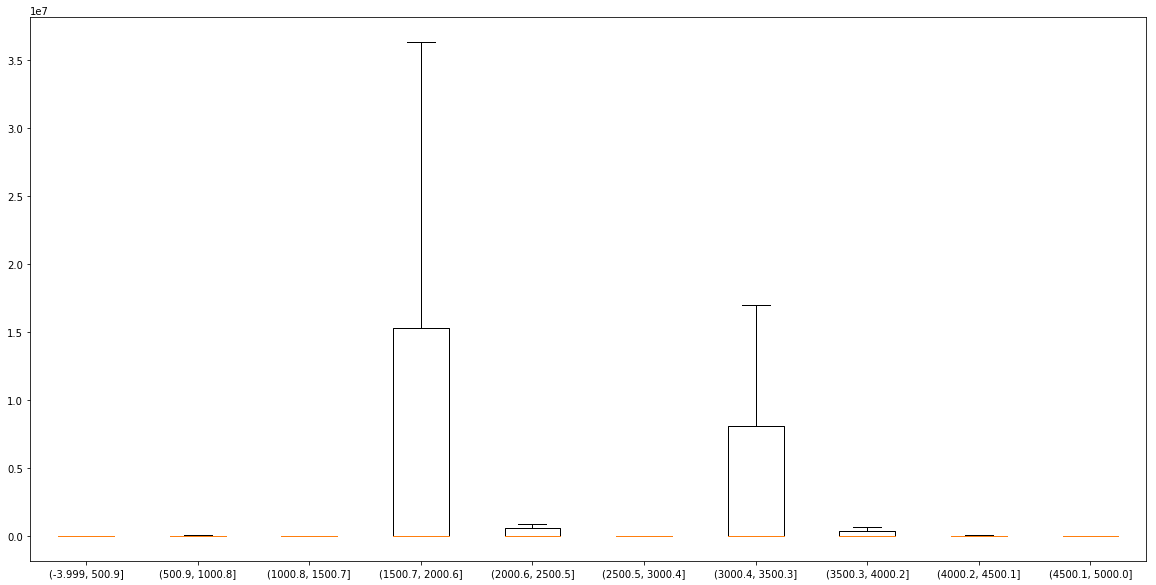

(10000, 'CONS', '1000+1000', True, 'GEOMETRIC')


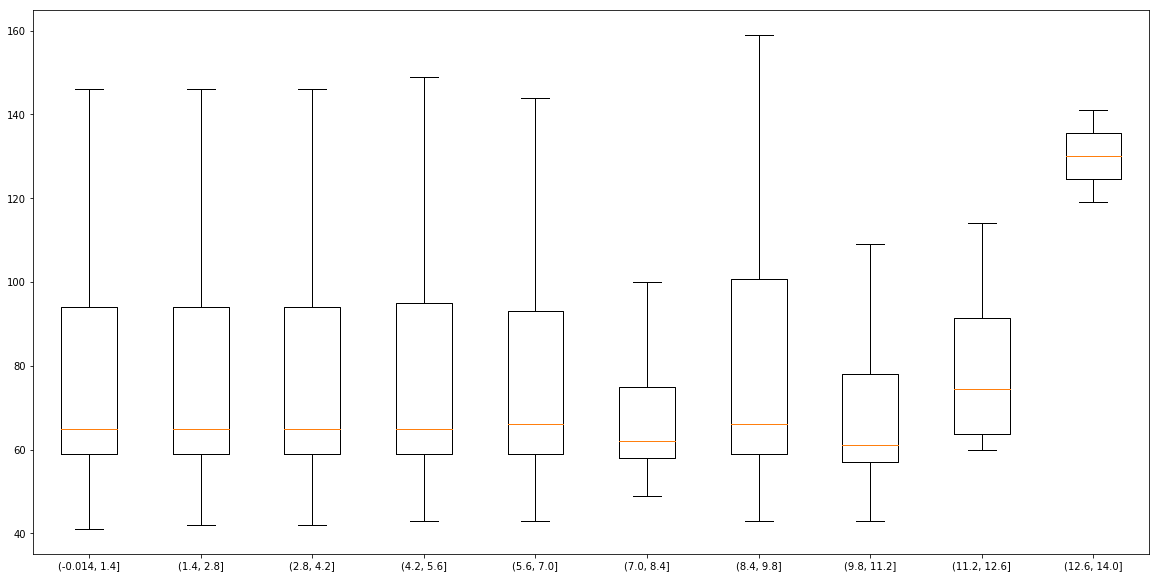

(10000, 'CONS', '1000+1000', True, 'UNIFORM')


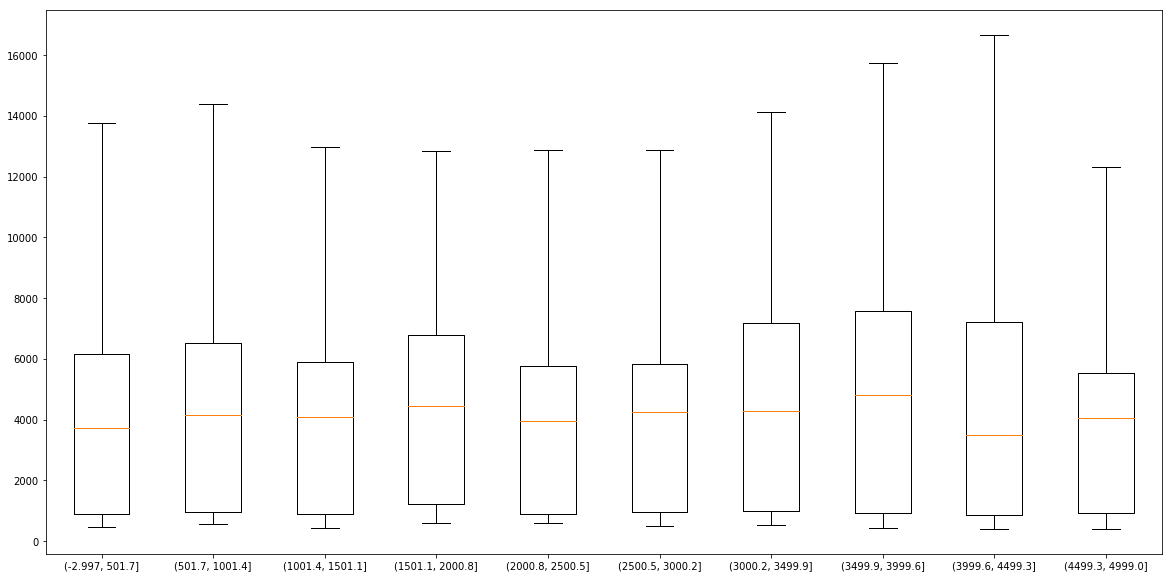

(10000, 'PROD', '100+100', True, 'GEOMETRIC')


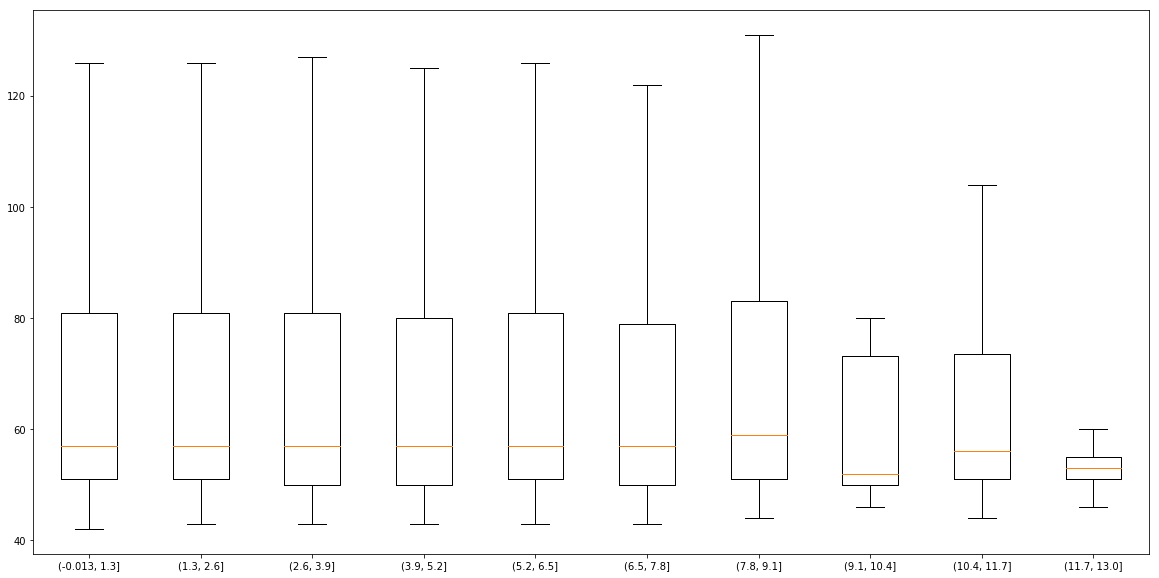

(10000, 'PROD', '100+100', True, 'UNIFORM')


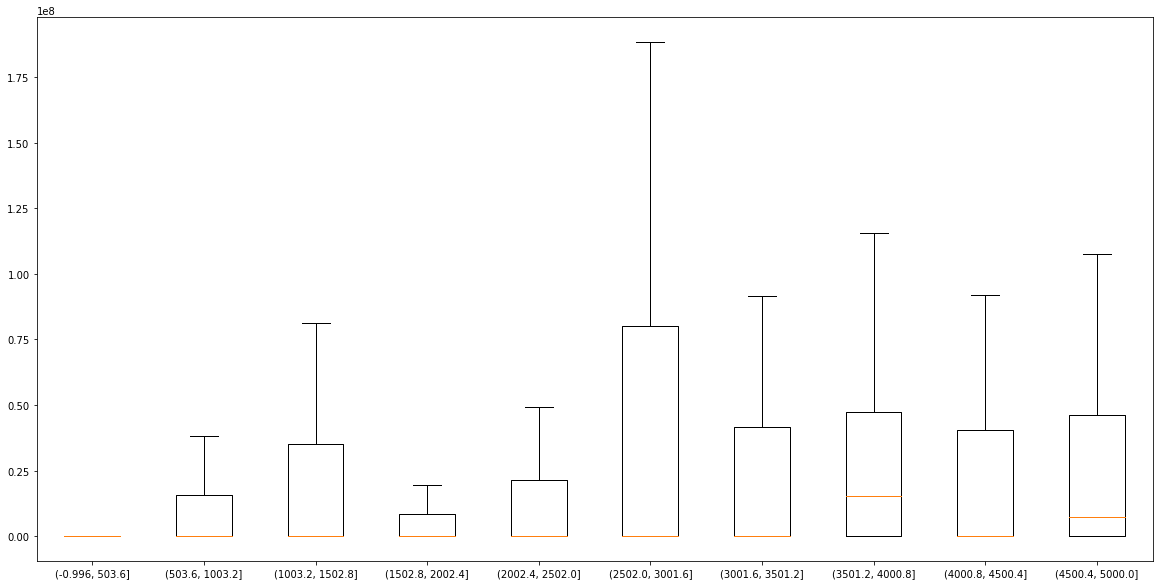

(10000, 'PROD', '1000+1000', True, 'GEOMETRIC')


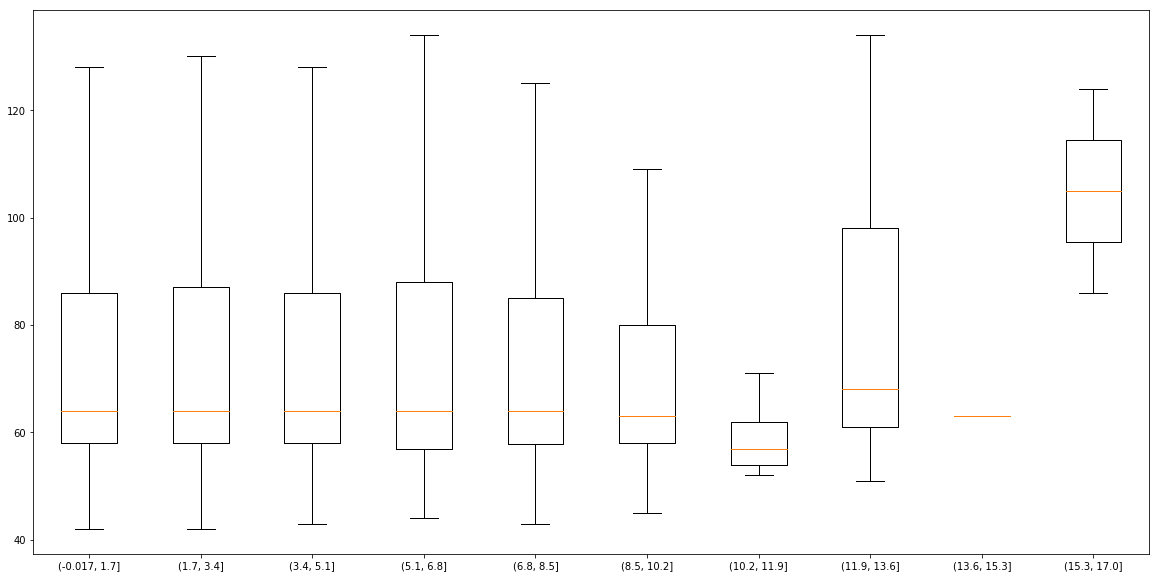

(10000, 'PROD', '1000+1000', True, 'UNIFORM')


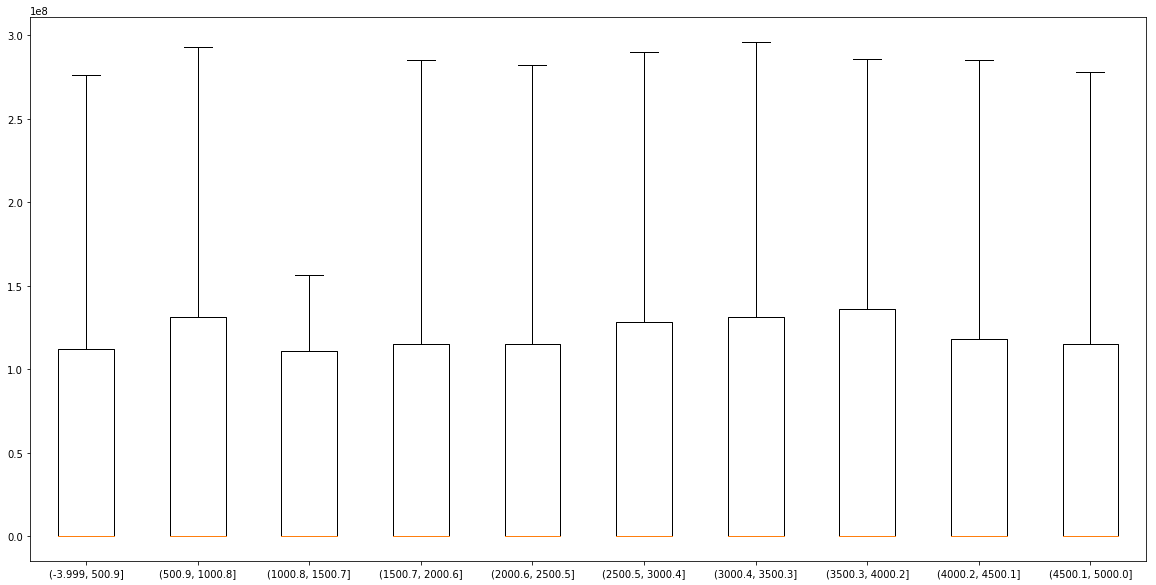

(100000, 'CONS', '100+100', True, 'GEOMETRIC')


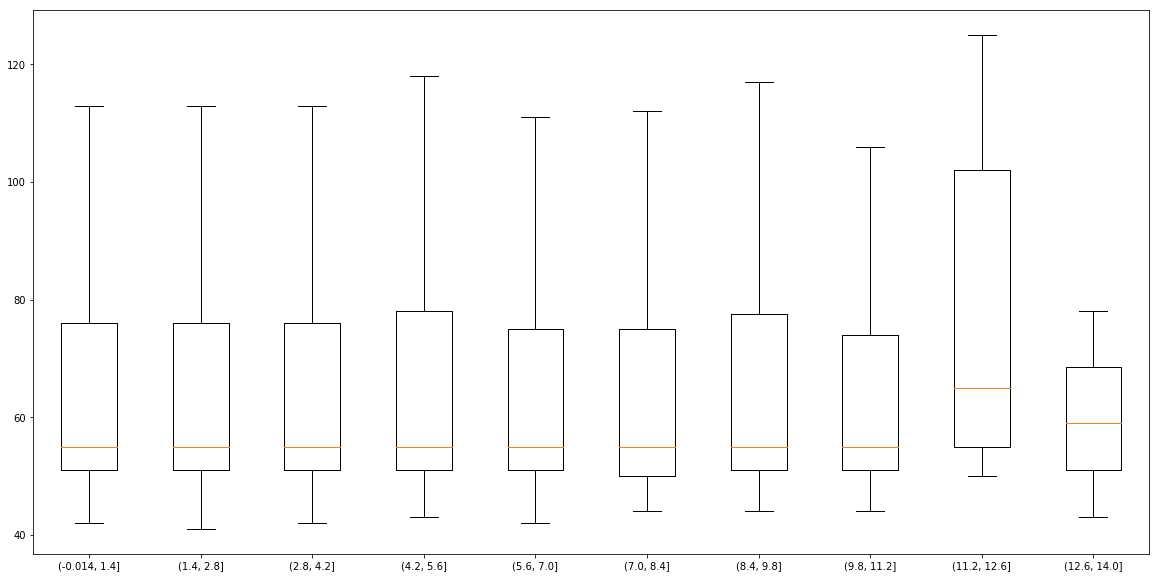

(100000, 'CONS', '100+100', True, 'UNIFORM')


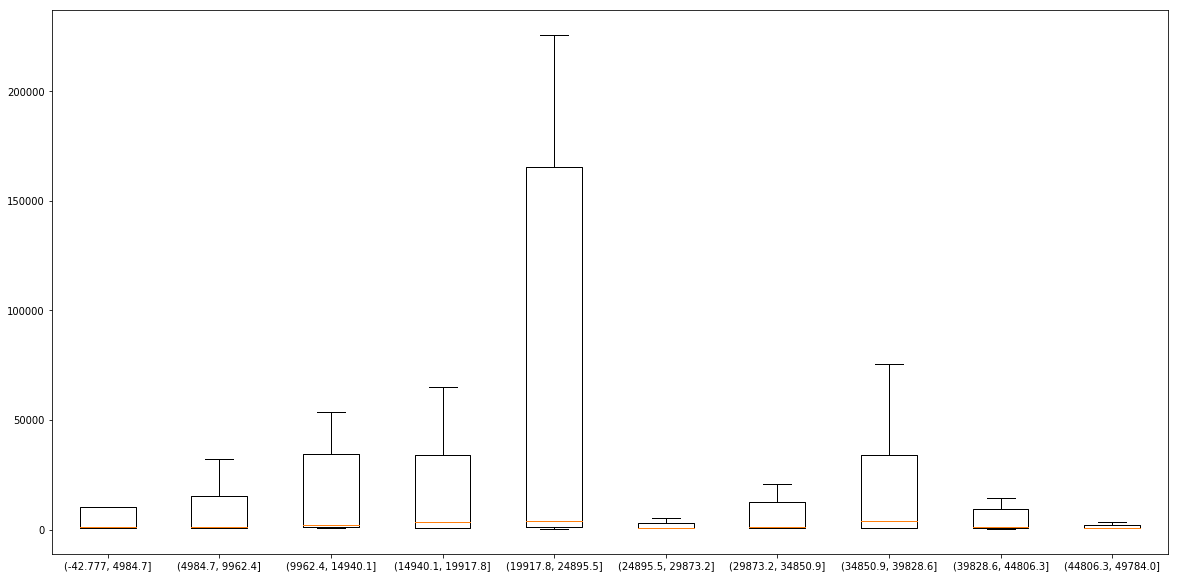

(100000, 'CONS', '1000+1000', True, 'GEOMETRIC')


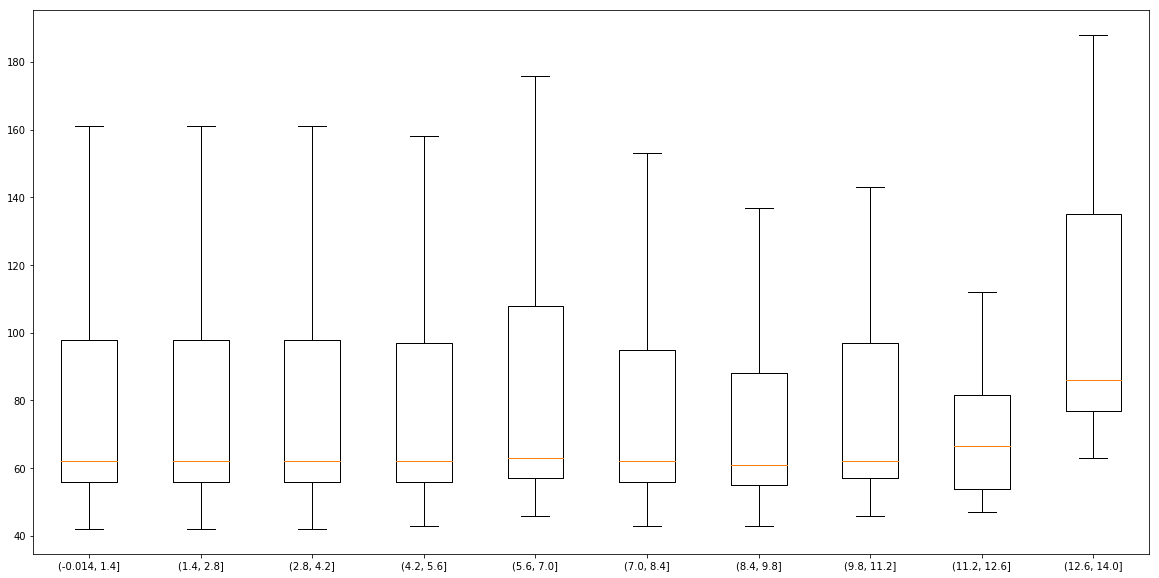

(100000, 'CONS', '1000+1000', True, 'UNIFORM')


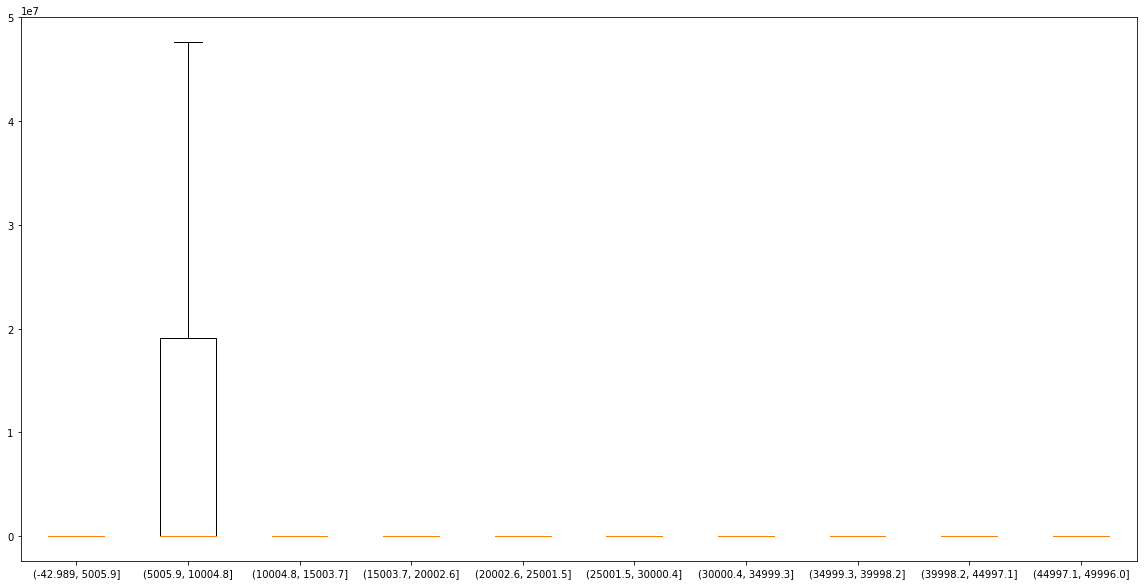

(100000, 'PROD', '100+100', True, 'GEOMETRIC')


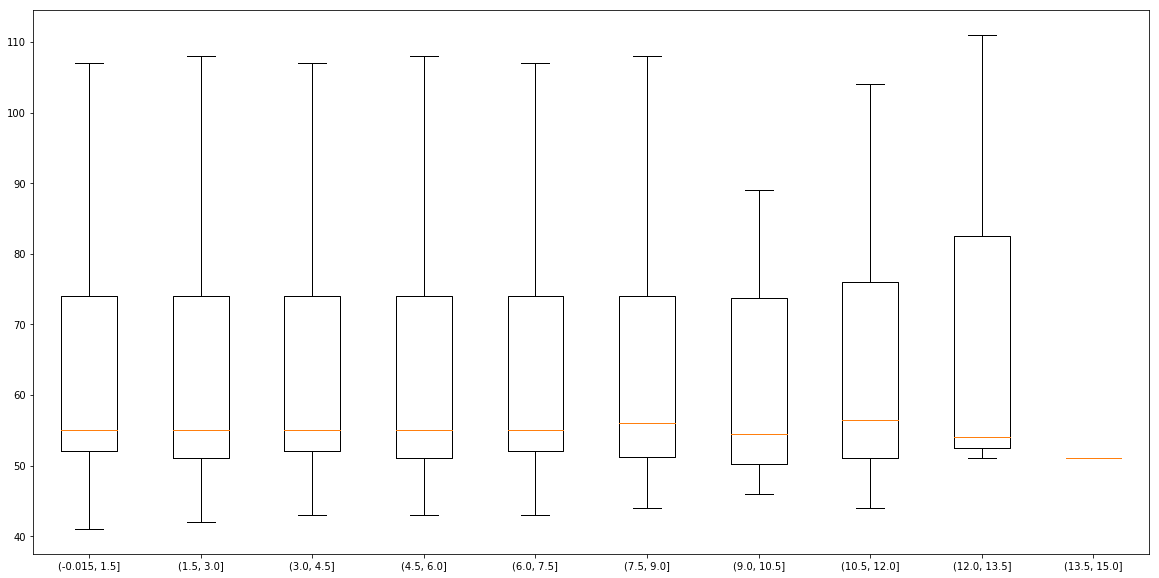

(100000, 'PROD', '100+100', True, 'UNIFORM')


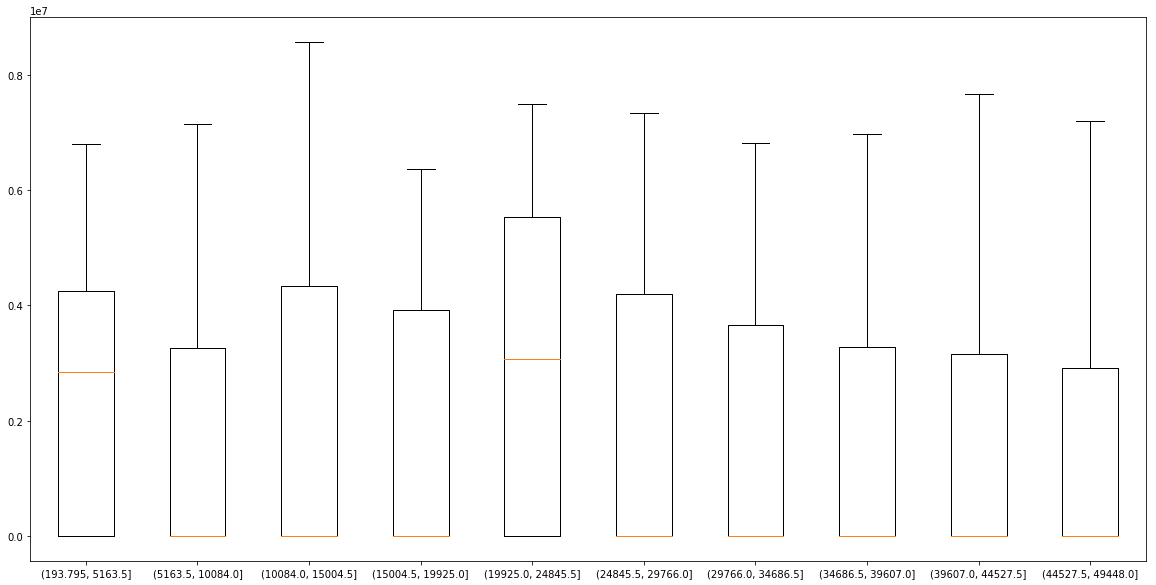

(100000, 'PROD', '1000+1000', True, 'GEOMETRIC')


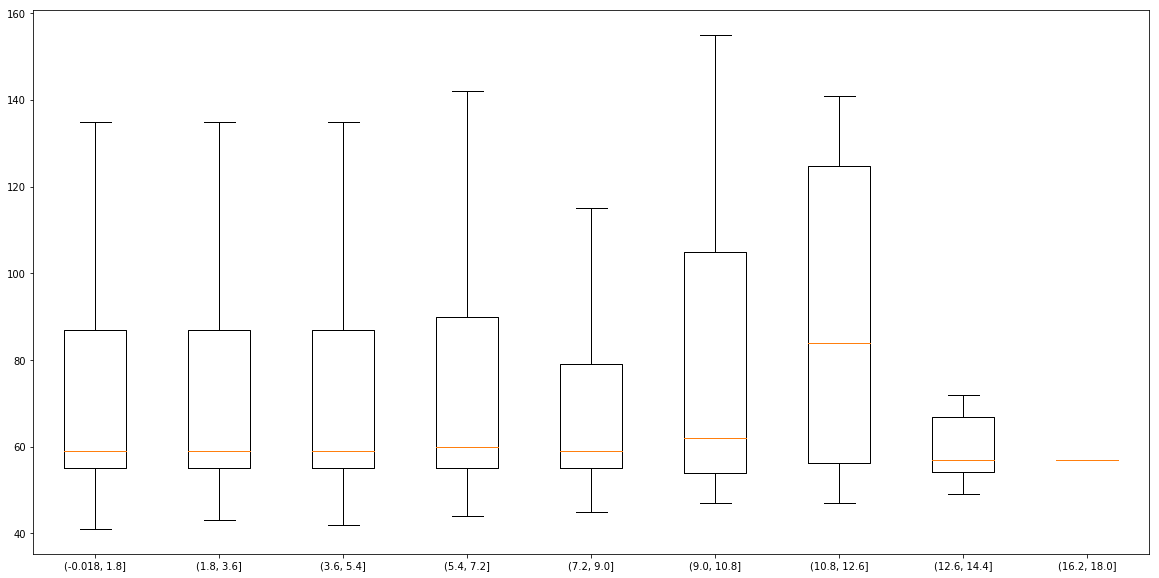

(100000, 'PROD', '1000+1000', True, 'UNIFORM')


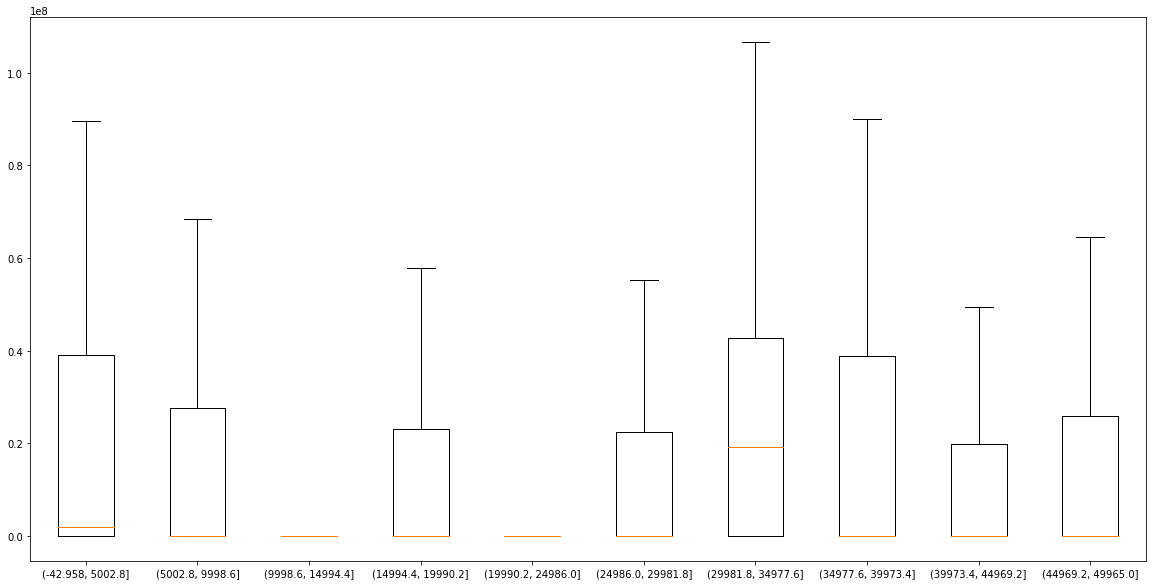

In [7]:
for name, g in groups:
    print(name)
    
    # Cut the sizes.
    n_bins = 10
    cut_sizes = pd.cut(g['size'], n_bins)
    
    buckets = []
    for bucket in cut_sizes.unique():
        buckets.append(g['time'][cut_sizes == bucket])
        
    plt.figure(figsize=(20, 10))
    plt.boxplot(buckets, labels=cut_sizes.unique().categories, showfliers=False)
    plt.show()